# SVM

## Load Data

In [4]:
import pandas as pd

# Load the provided data files
file_path_neg = 'C:/Users/ddes2/Desktop/桌面/BML/Assignment_3/AAC_neg.csv'
file_path_pos = 'C:/Users/ddes2/Desktop/桌面/BML/Assignment_3/AAC_pos.csv'

negative_data = pd.read_csv(file_path_neg)
positive_data = pd.read_csv(file_path_pos)

# Display the first few rows of each dataset for review
negative_data_head = negative_data.head()
positive_data_head = positive_data.head()

negative_data_head, positive_data_head

(   Unnamed: 0       #         A         C         D         E         F  \
 0           0  Q2RBM4  0.096774  0.000000  0.161290  0.129032  0.000000   
 1           1  Q2RBM4  0.064516  0.000000  0.032258  0.032258  0.032258   
 2           2  Q2RBM4  0.096774  0.000000  0.064516  0.032258  0.000000   
 3           3  Q2RBM4  0.064516  0.032258  0.064516  0.064516  0.096774   
 4           4  Q2RBM4  0.032258  0.064516  0.064516  0.032258  0.161290   
 
           G         H         I  ...         M         N         P         Q  \
 0  0.032258  0.096774  0.000000  ...  0.032258  0.032258  0.032258  0.000000   
 1  0.096774  0.032258  0.000000  ...  0.032258  0.064516  0.000000  0.032258   
 2  0.129032  0.032258  0.032258  ...  0.000000  0.129032  0.000000  0.000000   
 3  0.000000  0.064516  0.064516  ...  0.000000  0.064516  0.064516  0.064516   
 4  0.096774  0.064516  0.096774  ...  0.000000  0.032258  0.064516  0.032258   
 
           R         S         T         V    W       

c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\clust

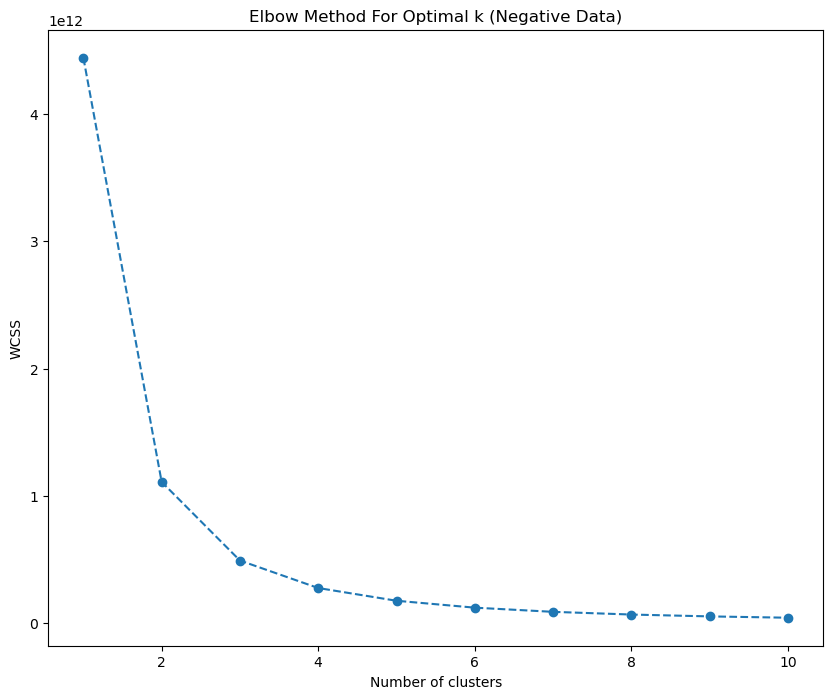

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Drop the unnecessary part
negative_data_numeric = negative_data.drop(columns=['#'])

# Function to calculate the sum of squared distances for different number of clusters
def calculate_wcss(data):
    wcss = []
    for i in range(1, 11):
        kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(negative_data_numeric)
        wcss.append(kmeans.inertia_)
    return wcss

# Prepare data for KMeans (drop the 'name' column as it's not needed for clustering)
X_neg = negative_data_head.drop('#', axis=1)

# Calculate WCSS for different number of clusters
wcss_neg = calculate_wcss(X_neg)

# Plot the elbow graph
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss_neg, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k (Negative Data)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [16]:
wcss_neg_cleaned = calculate_wcss(wcss_neg)
wcss_neg_cleaned

c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\clust

[4438623207981.863,
 1109657242262.542,
 493188666356.95404,
 277433731799.7699,
 177573234888.25085,
 123316859329.98708,
 90593340928.246,
 69362858507.70068,
 54817644899.865814,
 44410031364.430695]

In [20]:
# Inspect the first few rows of the negative data to identify non-numeric columns
negative_data_head = X_neg.head()
negative_data_head


,Unnamed: 0,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,0,0.096774,0.000000,0.161290,0.129032,0.000000,0.032258,0.096774,0.000000,0.096774,...,0.032258,0.032258,0.032258,0.000000,0.096774,0.000000,0.096774,0.032258,0.0,0.000000
1,1,0.064516,0.000000,0.032258,0.032258,0.032258,0.096774,0.032258,0.000000,0.032258,...,0.032258,0.064516,0.000000,0.032258,0.096774,0.096774,0.032258,0.096774,0.0,0.032258
2,2,0.096774,0.000000,0.064516,0.032258,0.000000,0.129032,0.032258,0.032258,0.064516,...,0.000000,0.129032,0.000000,0.000000,0.000000,0.064516,0.000000,0.161290,0.0,0.000000
3,3,0.064516,0.032258,0.064516,0.064516,0.096774,0.000000,0.064516,0.064516,0.032258,...,0.000000,0.064516,0.064516,0.064516,0.000000,0.096774,0.032258,0.096774,0.0,0.032258
4,4,0.032258,0.064516,0.064516,0.032258,0.161290,0.096774,0.064516,0.096774,0.032258,...,0.000000,0.032258,0.064516,0.032258,0.032258,0.096774,0.000000,0.032258,0.0,0.032258


In [25]:
# Re-prepare the data for clustering by excluding non-numeric columns
negative_data_cleaned = negative_data.drop(columns=['#'])
n_clusters=3
samples_per_cluster = len(positive_data) // n_clusters

# Perform KMeans clustering on the cleaned negative data with 3 clusters
kmeans = KMeans(n_clusters, random_state=42)
negative_data_clusters = kmeans.fit_predict(negative_data_cleaned)

# Add the cluster information to the negative data
X_neg = negative_data_cleaned.copy()
X_neg['Cluster'] = negative_data_clusters

# Sample data from each cluster to match the number of positive samples
balanced_neg_data = pd.DataFrame()
for cluster in range(n_clusters):
    cluster_sample_count = len(X_neg[X_neg['Cluster'] == cluster])
    num_samples = min(samples_per_cluster, cluster_sample_count)
    sampled_data = X_neg[X_neg['Cluster'] == cluster].sample(n=num_samples, random_state=42)
    balanced_neg_data = pd.concat([balanced_neg_data, sampled_data], ignore_index=True)

# Check the total number of selected negative samples
total_selected_neg_samples = len(balanced_neg_data)
total_selected_neg_samples


c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4959

拆分數據集

In [26]:
combined_data = pd.concat([positive_data, balanced_neg_data], ignore_index=True)
combined_data['Label'] = [1 if i < len(positive_data) else 0 for i in range(len(combined_data))]

In [27]:
len(combined_data)

9919

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = combined_data.drop(columns=['Unnamed: 0', '#', 'Cluster', 'Label'])
y = combined_data['Label']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


## Model Building

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Instantiate the SVM model
svm_model = SVC(probability=True)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=10)

# Calculate average score from cross-validation
avg_cv_score = cv_scores.mean()

# Print the average score
print("Average 10-Fold CV Score: {:.2f}".format(avg_cv_score))

# You can also fit the model on the entire training set if you need to make predictions later
# svm_model.fit(X_train, y_train)


Average 10-Fold CV Score: 0.65


In [31]:
svm_model.fit(X_train, y_train)
# 在驗證集和測試集上評估模型效果

y_val_pred = svm_model.predict(X_val)
y_test_pred = svm_model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Helper function to calculate sensitivity and specificity
def calc_sens_spec(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
    return sensitivity, specificity

# Calculate metrics for validation set
sensitivity_val, specificity_val = calc_sens_spec(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

# Calculate metrics for testing set
sensitivity_test, specificity_test = calc_sens_spec(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print validation metrics
# print(f'Validation - Sensitivity: {sensitivity_val}, Specificity: {specificity_val}, '
#       f'Accuracy: {accuracy_val}, MCC: {mcc_val}, F1 Score: {f1_val}')

print(f'''Validation -
Sensitivity: {sensitivity_val}
Specificity: {specificity_val}
Accuracy: {accuracy_val}
MCC: {mcc_val}
F1 Score: {f1_val}''')

# Print test metrics
# print(f'Test - Sensitivity: {sensitivity_test}, Specificity: {specificity_test}, '
#       f'Accuracy: {accuracy_test}, MCC: {mcc_test}, F1 Score: {f1_test}')
print(f'''Test -
Sensitivity: {sensitivity_test}
Specificity: {specificity_test}
Accuracy: {accuracy_test}
MCC: {mcc_test}
F1 Score: {f1_test}''')



Validation -
Sensitivity: 0.7245508982035929
Specificity: 0.5906313645621182
Accuracy: 0.6582661290322581
MCC: 0.31817052282262454
F1 Score: 0.6816901408450704
Test -
Sensitivity: 0.7037037037037037
Specificity: 0.5970772442588727
Accuracy: 0.6522177419354839
MCC: 0.3026807667142433
F1 Score: 0.6766635426429242


Val -
fpr_val: [0.         0.40936864 1.        ]
tpr_val: [0.        0.7245509 1.       ]
AUC_val: 0.6575911313828555
Test -
fpr_test: [0.         0.40292276 1.        ]
tpr_test: [0.        0.7037037 1.       ]
AUC_test: 0.6503904739812882


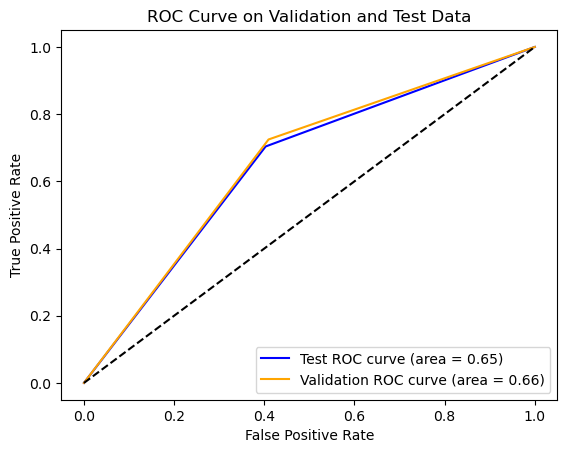

In [33]:
# Calculate ROC curve
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_test = auc(fpr_test, tpr_test)

print(f'''Val -
fpr_val: {fpr_val}
tpr_val: {tpr_val}
AUC_val: {roc_auc_val}''')

print(f'''Test -
fpr_test: {fpr_test}
tpr_test: {tpr_test}
AUC_test: {roc_auc_test}''')



plt.figure()

# Plot the ROC curve of testing
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test, color='blue')
plt.plot(fpr_val, tpr_val, label='Validation ROC curve (area = %0.2f)' % roc_auc_val, color='orange')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Validation and Test Data')
plt.legend(loc="lower right")
plt.show()
